In [1]:
import pandas as pd
df=pd.read_csv('Overview_genres.csv')

In [2]:
df.head()

,imdb_id,overview,tagline,title,Genres
0,tt0083866,After a gentle alien becomes stranded on Earth...,He is afraid. He is alone. He is three million...,E.T. the Extra-Terrestrial,"Family,Sci-Fi"
1,tt0116629,"On July 2, a giant alien mothership enters orb...",Earth. Take a good look. It might be your last.,Independence Day,"Action,Adventure,Sci-Fi"
2,tt0133093,"Set in the 22nd century, The Matrix tells the ...",Welcome to the Real World.,The Matrix,"Action,Sci-Fi"
3,tt0234215,Six months after the events depicted in The Ma...,Free your mind.,The Matrix Reloaded,"Action,Sci-Fi"
4,tt0242653,The human city of Zion defends itself against ...,Everything that has a beginning has an end.,The Matrix Revolutions,"Action,Sci-Fi"


In [3]:
#for entry in df['Genres']:
 #   entry.remove(',,')
    
print(df['Genres'][0])

Family,Sci-Fi


In [4]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [5]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df['overview'] = [entry.lower() for entry in df['overview']]
df['Genres'] = [entry.lower() for entry in df['Genres']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['overview']= [word_tokenize(entry) for entry in df['overview']]
df['Genres']= [word_tokenize(entry) for entry in df['Genres']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['overview']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)

In [7]:
for entry in df['Genres']:
    if ','in entry:
        entry.remove(',')

In [8]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text_final'],df['Genres'],test_size=0.25)

In [9]:
mlb = MultiLabelBinarizer()
Train_Y = pd.DataFrame(mlb.fit_transform(Train_Y))
Test_Y = pd.DataFrame(mlb.fit_transform(Test_Y))

In [10]:
Train_Y

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Test_X_Tfidf)

  (0, 997)	0.13197950963395003
  (0, 992)	0.22948315444924308
  (0, 987)	0.16878955759703
  (0, 857)	0.24488922658699794
  (0, 833)	0.15261836761696884
  (0, 822)	0.22038884976449635
  (0, 722)	0.23277985945569088
  (0, 709)	0.19201130555820023
  (0, 665)	0.2555100411950856
  (0, 603)	0.24964995179168128
  (0, 572)	0.19313184680002732
  (0, 552)	0.2593285773329234
  (0, 525)	0.23185592046485995
  (0, 500)	0.19389509179560033
  (0, 448)	0.25499068032803285
  (0, 398)	0.2098053368850216
  (0, 347)	0.1798496595701885
  (0, 301)	0.22230764635961361
  (0, 168)	0.22535294737349976
  (0, 87)	0.16639392860560506
  (0, 84)	0.2928304037012541
  (1, 997)	0.11762196139445975
  (1, 922)	0.23214651436823075
  (1, 833)	0.27203119323169306
  (1, 830)	0.1785840239958886
  :	:
  (2608, 846)	0.17468816909876694
  (2608, 821)	0.13582907794283824
  (2608, 818)	0.19301730992889501
  (2608, 807)	0.12879065614231078
  (2608, 796)	0.19043218242605683
  (2608, 759)	0.13305071332578217
  (2608, 641)	0.1682534078

In [127]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [128]:
print(Train_Y.shape)
print(Test_Y.shape)

(7826, 22)
(2609, 22)


In [14]:
prediction_SVM = OneVsRestClassifier(LinearSVC(random_state=5)).fit(Train_X_Tfidf, Train_Y).predict(Test_X_Tfidf)
print(prediction_SVM.shape)

(2609, 22)


In [15]:
def custom_score(prediction, Test_Y):
    B=prediction+Test_Y
    
    Global = np.count_nonzero(B == 2)/np.count_nonzero(Test_Y == 1)*100
    
    a = np.zeros([1,B.shape[0]])
    b = np.zeros([1,B.shape[0]])
    
    for i in range(len(B)):
        a[0,i] = np.count_nonzero(B[i] == 2)
        b[0,i] = np.count_nonzero(Test_Y[i] == 1)
        
    counter = 0
    
    for i in B:
        if 2 in i:
            counter+=1
    
    Just_one = counter/len(B)*100
        
    return [Global, 100*np.mean(np.divide(a,b)), Just_one]

In [16]:
custom_score(prediction_SVM, Test_Y.values)

[44.447954509556155, 47.02312507985179, 76.81103871215025]

In [17]:
prediction_NB=OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None)).fit(Train_X_Tfidf, Train_Y).predict(Test_X_Tfidf)
custom_score(prediction_NB, Test_Y.values)

[26.994155741589005, 30.01149865848984, 57.608279034112684]

In [18]:
prediction_SVC = OneVsRestClassifier(SVC(kernel='linear')).fit(Train_X_Tfidf, Train_Y).predict(Test_X_Tfidf)
custom_score(prediction_SVC, Test_Y.values)

[39.44084662770494, 42.22562923214513, 72.9781525488693]

In [19]:
prediction_Logistic = OneVsRestClassifier(LogisticRegression(
    random_state=0, solver='sag',multi_class='multinomial')).fit(Train_X_Tfidf, Train_Y).predict(Test_X_Tfidf)
custom_score(prediction_Logistic, Test_Y.values)

[37.18211972832096, 39.72786508240706, 69.7968570333461]

In [20]:
prediction_RF = OneVsRestClassifier(RandomForestClassifier(
    n_estimators=100,bootstrap=True, max_features='sqrt')).fit(Train_X_Tfidf, Train_Y).predict(Test_X_Tfidf)
custom_score(prediction_RF, Test_Y.values)

[29.331859105986418, 32.08764533026702, 60.59793024147183]

In [21]:
prediction_KN = OneVsRestClassifier(
    KNeighborsClassifier(n_neighbors=1)).fit(Train_X_Tfidf, Train_Y).predict(Test_X_Tfidf)
custom_score(prediction_KN, Test_Y.values)

[39.09335018164587, 40.55832375111792, 68.80030663089306]

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [193]:
model = Sequential()
model.add(Dense(100, input_dim=1000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(22, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(Train_X_Tfidf, Train_Y, validation_split=0.1, epochs=15, batch_size=10)

Train on 7043 samples, validate on 783 samples
Epoch 1/15
7043/7043 [==============================] - 20s 3ms/step - loss: 0.2942 - acc: 0.8893 - val_loss: 0.2468 - val_acc: 0.9020
Epoch 2/15
7043/7043 [==============================] - 7s 1ms/step - loss: 0.2231 - acc: 0.9102 - val_loss: 0.2259 - val_acc: 0.9096
Epoch 3/15
7043/7043 [==============================] - 7s 1ms/step - loss: 0.2024 - acc: 0.9174 - val_loss: 0.2242 - val_acc: 0.9108
Epoch 4/15
7043/7043 [==============================] - 7s 1ms/step - loss: 0.1902 - acc: 0.9216 - val_loss: 0.2261 - val_acc: 0.9108
Epoch 5/15
7043/7043 [==============================] - 7s 1ms/step - loss: 0.1802 - acc: 0.9251 - val_loss: 0.2307 - val_acc: 0.9085
Epoch 6/15
7043/7043 [==============================] - 7s 1ms/step - loss: 0.1715 - acc: 0.9290 - val_loss: 0.2321 - val_acc: 0.9089
Epoch 7/15
7043/7043 [==============================] - 8s 1ms/step - loss: 0.1634 - acc: 0.9321 - val_loss: 0.2354 - val_acc: 0.9065
Epoch 8/15
704

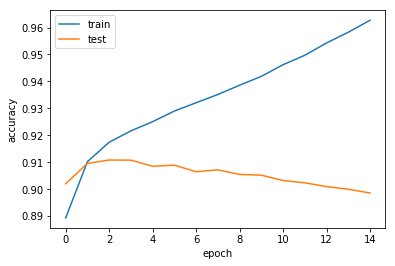

In [194]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

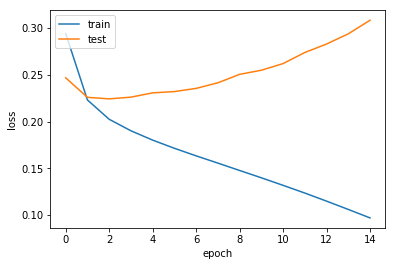

In [195]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.show()

In [196]:
prediction_Sequential = np.around(model.predict(Test_X_Tfidf))
custom_score(prediction_Sequential, Test_Y.values)

[47.796556626125415, 50.12137472850389, 80.41395170563435]

In [39]:
vec = np.arange(1,9)
a = np.zeros((3,8))
for n in vec:
    model = Sequential()
    model.add(Dense(100, input_dim=5000, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(22, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(Train_X_Tfidf, Train_Y, epochs=n, batch_size=50)
    prediction_Sequential = np.around(model.predict(Test_X_Tfidf))
    s = custom_score(prediction_Sequential, Test_Y.values)
    a[:,n-1]=s

print(a)

Epoch 1/1
7826/7826 [==============================] - 8s 1ms/step - loss: 0.3354 - acc: 0.8760
Epoch 1/2
7826/7826 [==============================] - 8s 1ms/step - loss: 0.3243 - acc: 0.8831
Epoch 2/2
7826/7826 [==============================] - 7s 857us/step - loss: 0.2203 - acc: 0.9111
Epoch 1/3
7826/7826 [==============================] - 8s 1ms/step - loss: 0.3321 - acc: 0.8794
Epoch 2/3
7826/7826 [==============================] - 7s 870us/step - loss: 0.2279 - acc: 0.9092
Epoch 3/3
7826/7826 [==============================] - 7s 853us/step - loss: 0.1738 - acc: 0.9310
Epoch 1/4
7826/7826 [==============================] - 8s 1ms/step - loss: 0.3457 - acc: 0.8698
Epoch 2/4
7826/7826 [==============================] - 7s 854us/step - loss: 0.2358 - acc: 0.9056
Epoch 3/4
7826/7826 [==============================] - 7s 866us/step - loss: 0.1901 - acc: 0.9233
Epoch 4/4
7826/7826 [==============================] - 7s 864us/step - loss: 0.1536 - acc: 0.9387
Epoch 1/5
7826/7826 [=======

In [30]:
import matplotlib.pyplot as plt

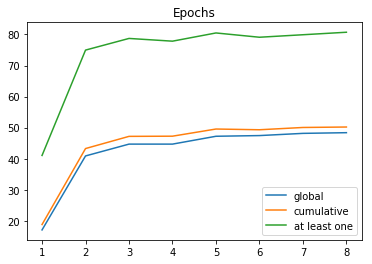

In [46]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(vec, a[0,:], label='global')
plt.plot(vec, a[1,:], label='cumulative')
plt.plot(vec, a[2,:], label='at least one')
plt.legend()
plt.show();

In [58]:
vec = np.arange(10,241,10)
a = np.zeros((3,len(vec)))
i=0
for n in vec:
    model = Sequential()
    model.add(Dense(100, input_dim=1000, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(22, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(Train_X_Tfidf, Train_Y, epochs=4, batch_size=n)
    prediction_Sequential = np.around(model.predict(Test_X_Tfidf))
    s = custom_score(prediction_Sequential, Test_Y.values)
    a[:,i]=s
    i+=1

print(a)

Epoch 1/4
7826/7826 [==============================] - 32s 4ms/step - loss: 0.2622 - acc: 0.8980
Epoch 2/4
7826/7826 [==============================] - 28s 4ms/step - loss: 0.1803 - acc: 0.9266
Epoch 3/4
7826/7826 [==============================] - 28s 4ms/step - loss: 0.1277 - acc: 0.9484
Epoch 4/4
7826/7826 [==============================] - 28s 4ms/step - loss: 0.0776 - acc: 0.9709
Epoch 1/4
7826/7826 [==============================] - 21s 3ms/step - loss: 0.2851 - acc: 0.8918
Epoch 2/4
7826/7826 [==============================] - 17s 2ms/step - loss: 0.1906 - acc: 0.9233
Epoch 3/4
7826/7826 [==============================] - 18s 2ms/step - loss: 0.1414 - acc: 0.9425
Epoch 4/4
7826/7826 [==============================] - 18s 2ms/step - loss: 0.0991 - acc: 0.9622
Epoch 1/4
7826/7826 [==============================] - 15s 2ms/step - loss: 0.3018 - acc: 0.8837
Epoch 2/4
7826/7826 [==============================] - 11s 1ms/step - loss: 0.2017 - acc: 0.9189
Epoch 3/4
7826/7826 [=========

7826/7826 [==============================] - 2s 252us/step - loss: 0.2311 - acc: 0.9065
Epoch 1/4
7826/7826 [==============================] - 7s 911us/step - loss: 0.5265 - acc: 0.7393
Epoch 2/4
7826/7826 [==============================] - 2s 249us/step - loss: 0.2900 - acc: 0.8910
Epoch 3/4
7826/7826 [==============================] - 2s 264us/step - loss: 0.2649 - acc: 0.8974
Epoch 4/4
7826/7826 [==============================] - 2s 263us/step - loss: 0.2371 - acc: 0.9062
Epoch 1/4
7826/7826 [==============================] - 8s 984us/step - loss: 0.4989 - acc: 0.8455
Epoch 2/4
7826/7826 [==============================] - 2s 312us/step - loss: 0.2885 - acc: 0.8910
Epoch 3/4
7826/7826 [==============================] - 2s 275us/step - loss: 0.2663 - acc: 0.8979
Epoch 4/4
7826/7826 [==============================] - 2s 242us/step - loss: 0.2408 - acc: 0.9084
Epoch 1/4
7826/7826 [==============================] - 8s 984us/step - loss: 0.5125 - acc: 0.8021
Epoch 2/4
7826/7826 [=========

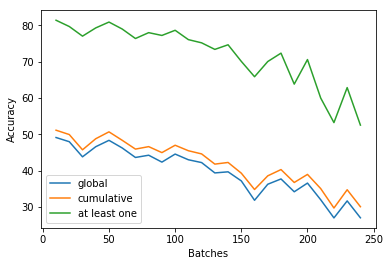

In [59]:
plt.xlabel('Batches')
plt.ylabel('Accuracy')
plt.plot(vec, a[0,:], label='global')
plt.plot(vec, a[1,:], label='cumulative')
plt.plot(vec, a[2,:], label='at least one')
plt.legend()
plt.show();

In [94]:
#vec = np.arange(150,250,20)
#m = 5
#J = np.arange(0,3*m,3)
#a = np.zeros((3*m,len(vec)))

#for j in J:
#    i=0
#    for n in vec:
#        model = Sequential()
#        model.add(Dense(500, input_dim=5000, activation='relu'))
#        model.add(Dense(100, activation='relu'))
#        model.add(Dense(50, activation='relu'))
#        model.add(Dense(22, activation='sigmoid'))

#        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#        model.fit(Train_X_Tfidf, Train_Y, epochs=3, batch_size=n)
#        prediction_Sequential = np.around(model.predict(Test_X_Tfidf))
#        s = custom_score(prediction_Sequential, Test_Y.values)
#        a[j:j+3,i]=np.transpose(s)
#        i+=1
#M = np.average(a, axis=0)

Epoch 1/3
7826/7826 [==============================] - 11s 1ms/step - loss: 0.4181 - acc: 0.8583
Epoch 2/3
7826/7826 [==============================] - 3s 358us/step - loss: 0.2733 - acc: 0.8937
Epoch 3/3
7826/7826 [==============================] - 3s 359us/step - loss: 0.2420 - acc: 0.9037
Epoch 1/3
7826/7826 [==============================] - 11s 1ms/step - loss: 0.4368 - acc: 0.8234
Epoch 2/3
7826/7826 [==============================] - 3s 339us/step - loss: 0.2737 - acc: 0.8937
Epoch 3/3
7826/7826 [==============================] - 3s 335us/step - loss: 0.2433 - acc: 0.9022
Epoch 1/3
7826/7826 [==============================] - 11s 1ms/step - loss: 0.4778 - acc: 0.8581
Epoch 2/3
7826/7826 [==============================] - 2s 313us/step - loss: 0.2848 - acc: 0.8907
Epoch 3/3
7826/7826 [==============================] - 2s 310us/step - loss: 0.2598 - acc: 0.8998
Epoch 1/3
7826/7826 [==============================] - 10s 1ms/step - loss: 0.5045 - acc: 0.7982
Epoch 2/3
7826/7826 [===

In [101]:
#a=np.reshape(a, (len(J),3*len(vec)))
#print(a)
#M=np.average(a,axis=0)
#S=np.std(a,axis=0)
#M=np.reshape(M,(3, len(vec)))
#S=np.reshape(S,(3, len(vec)))
#print(M,S)

[[32.31716948 33.37545411 21.93966198 22.98215132 17.09050703 34.98786253
  36.610451   24.57518845 25.44397598 18.80030663 63.20429283 66.07895745
  50.63242622 50.32579532 41.47182829]
 [31.55899542 25.85689465 21.79750434 23.44021482 18.36992576 34.09352242
  28.78497509 24.63906989 25.46314041 20.00766577 59.52472212 52.85550019
  45.61134534 49.7508624  44.57646608]
 [23.06112778 25.93587111 18.11720107 21.27625967 18.74901279 25.80171202
  28.81052766 20.36540181 23.63613134 20.37178996 49.67420468 54.92525872
  40.97355309 49.59754695 45.49635876]
 [30.91138841 17.48538935 21.03933028 10.10898752 20.47069973 33.63357608
  19.71381117 23.49559218 11.30062604 23.11869171 58.98811805 41.89344576
  47.52778842 24.53047144 45.18972787]
 [32.93318591 27.19949455 25.25667351 19.79150213 21.71852788 35.40309186
  30.63753673 28.12060815 22.33933819 25.00319407 65.15906478 59.06477578
  55.96013798 46.10962054 44.9597547 ]]
[[30.1563734  25.97062076 21.63007424 19.51982309 19.27973464]
 

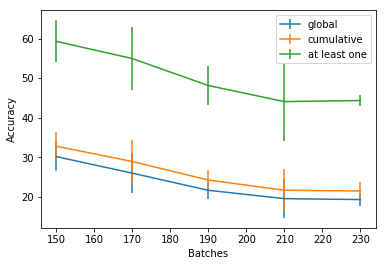

In [102]:
#plt.xlabel('Batches')
#plt.ylabel('Accuracy')
#plt.errorbar(vec, M[0,:], S[0,:], label='global')
#plt.errorbar(vec, M[1,:], S[1,:], label='cumulative')
#plt.errorbar(vec, M[2,:], S[2,:], label='at least one')
#plt.legend()
#plt.show();

In [129]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(1000, embedding_vecor_length, input_length=1000))
model.add(LSTM(22))
model.add(Dense(22, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Train_X_Tfidf, Train_Y, validation_data=(Test_X_Tfidf, Test_Y), epochs=3, batch_size=100)

Train on 7826 samples, validate on 2609 samples
Epoch 1/3
7826/7826 [==============================] - 72s 9ms/step - loss: 0.5190 - acc: 0.8488 - val_loss: 0.3260 - val_acc: 0.8897
Epoch 2/3
7826/7826 [==============================] - 61s 8ms/step - loss: 0.2983 - acc: 0.8887 - val_loss: 0.2845 - val_acc: 0.8901
Epoch 3/3
7826/7826 [==============================] - 62s 8ms/step - loss: 0.2842 - acc: 0.8894 - val_loss: 0.2810 - val_acc: 0.8897


In [130]:
scores=model.evaluate(Test_X_Tfidf,Test_Y)
print("Accuracy: %.2f%%" % (scores[1]*100))

2609/2609 [==============================] - 9s 3ms/step
Accuracy: 88.97%
